# Import modules

In [ ]:
!pip install -qq ipython-autotime
%load_ext autotime

## Install modules

In [ ]:
import pandas as pd

In [ ]:
!pip install opendatasets

## Import libraries

In [ ]:
import os

In [ ]:
import opendatasets as od

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import KFold, cross_val_score

# Load dataset

In [ ]:
loan_approval = pd.read_csv('/content/loan_data.csv')
loan_approval

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


# Basic EDA

In [ ]:
loan_approval.shape

(45000, 14)

In [ ]:
loan_approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Bộ dữ liệu không có giá trị Null.

In [ ]:
loan_approval.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [ ]:
def get_unique_info(dataframe: pd.DataFrame) -> pd.DataFrame:
    unique_info = []

    for column in loan_approval.select_dtypes(include=['object']).columns:
        unique_info.append([len(loan_approval[column].unique()), loan_approval[column].unique()])

    return pd.DataFrame(unique_info, index=loan_approval.select_dtypes(include=['object']).columns, columns=['Total unique value', 'Unique value'])

get_unique_info(loan_approval)

,Total unique value,Unique value
person_gender,2,"[female, male]"
person_education,5,"[Master, High School, Bachelor, Associate, Doc..."
person_home_ownership,4,"[RENT, OWN, MORTGAGE, OTHER]"
loan_intent,6,"[PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIM..."
previous_loan_defaults_on_file,2,"[No, Yes]"


In [ ]:
loan_approval[loan_approval.duplicated()]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


Bộ dữ liệu không có dòng trùng.

In [ ]:
categorical_features = list(loan_approval.select_dtypes(include=['object']).columns)
numeric_features = list(((loan_approval.select_dtypes(exclude=['object'])).drop(columns=['loan_status'])).columns)

In [ ]:
len(categorical_features), len(numeric_features)

(5, 8)

# Visualize

## Categorical features

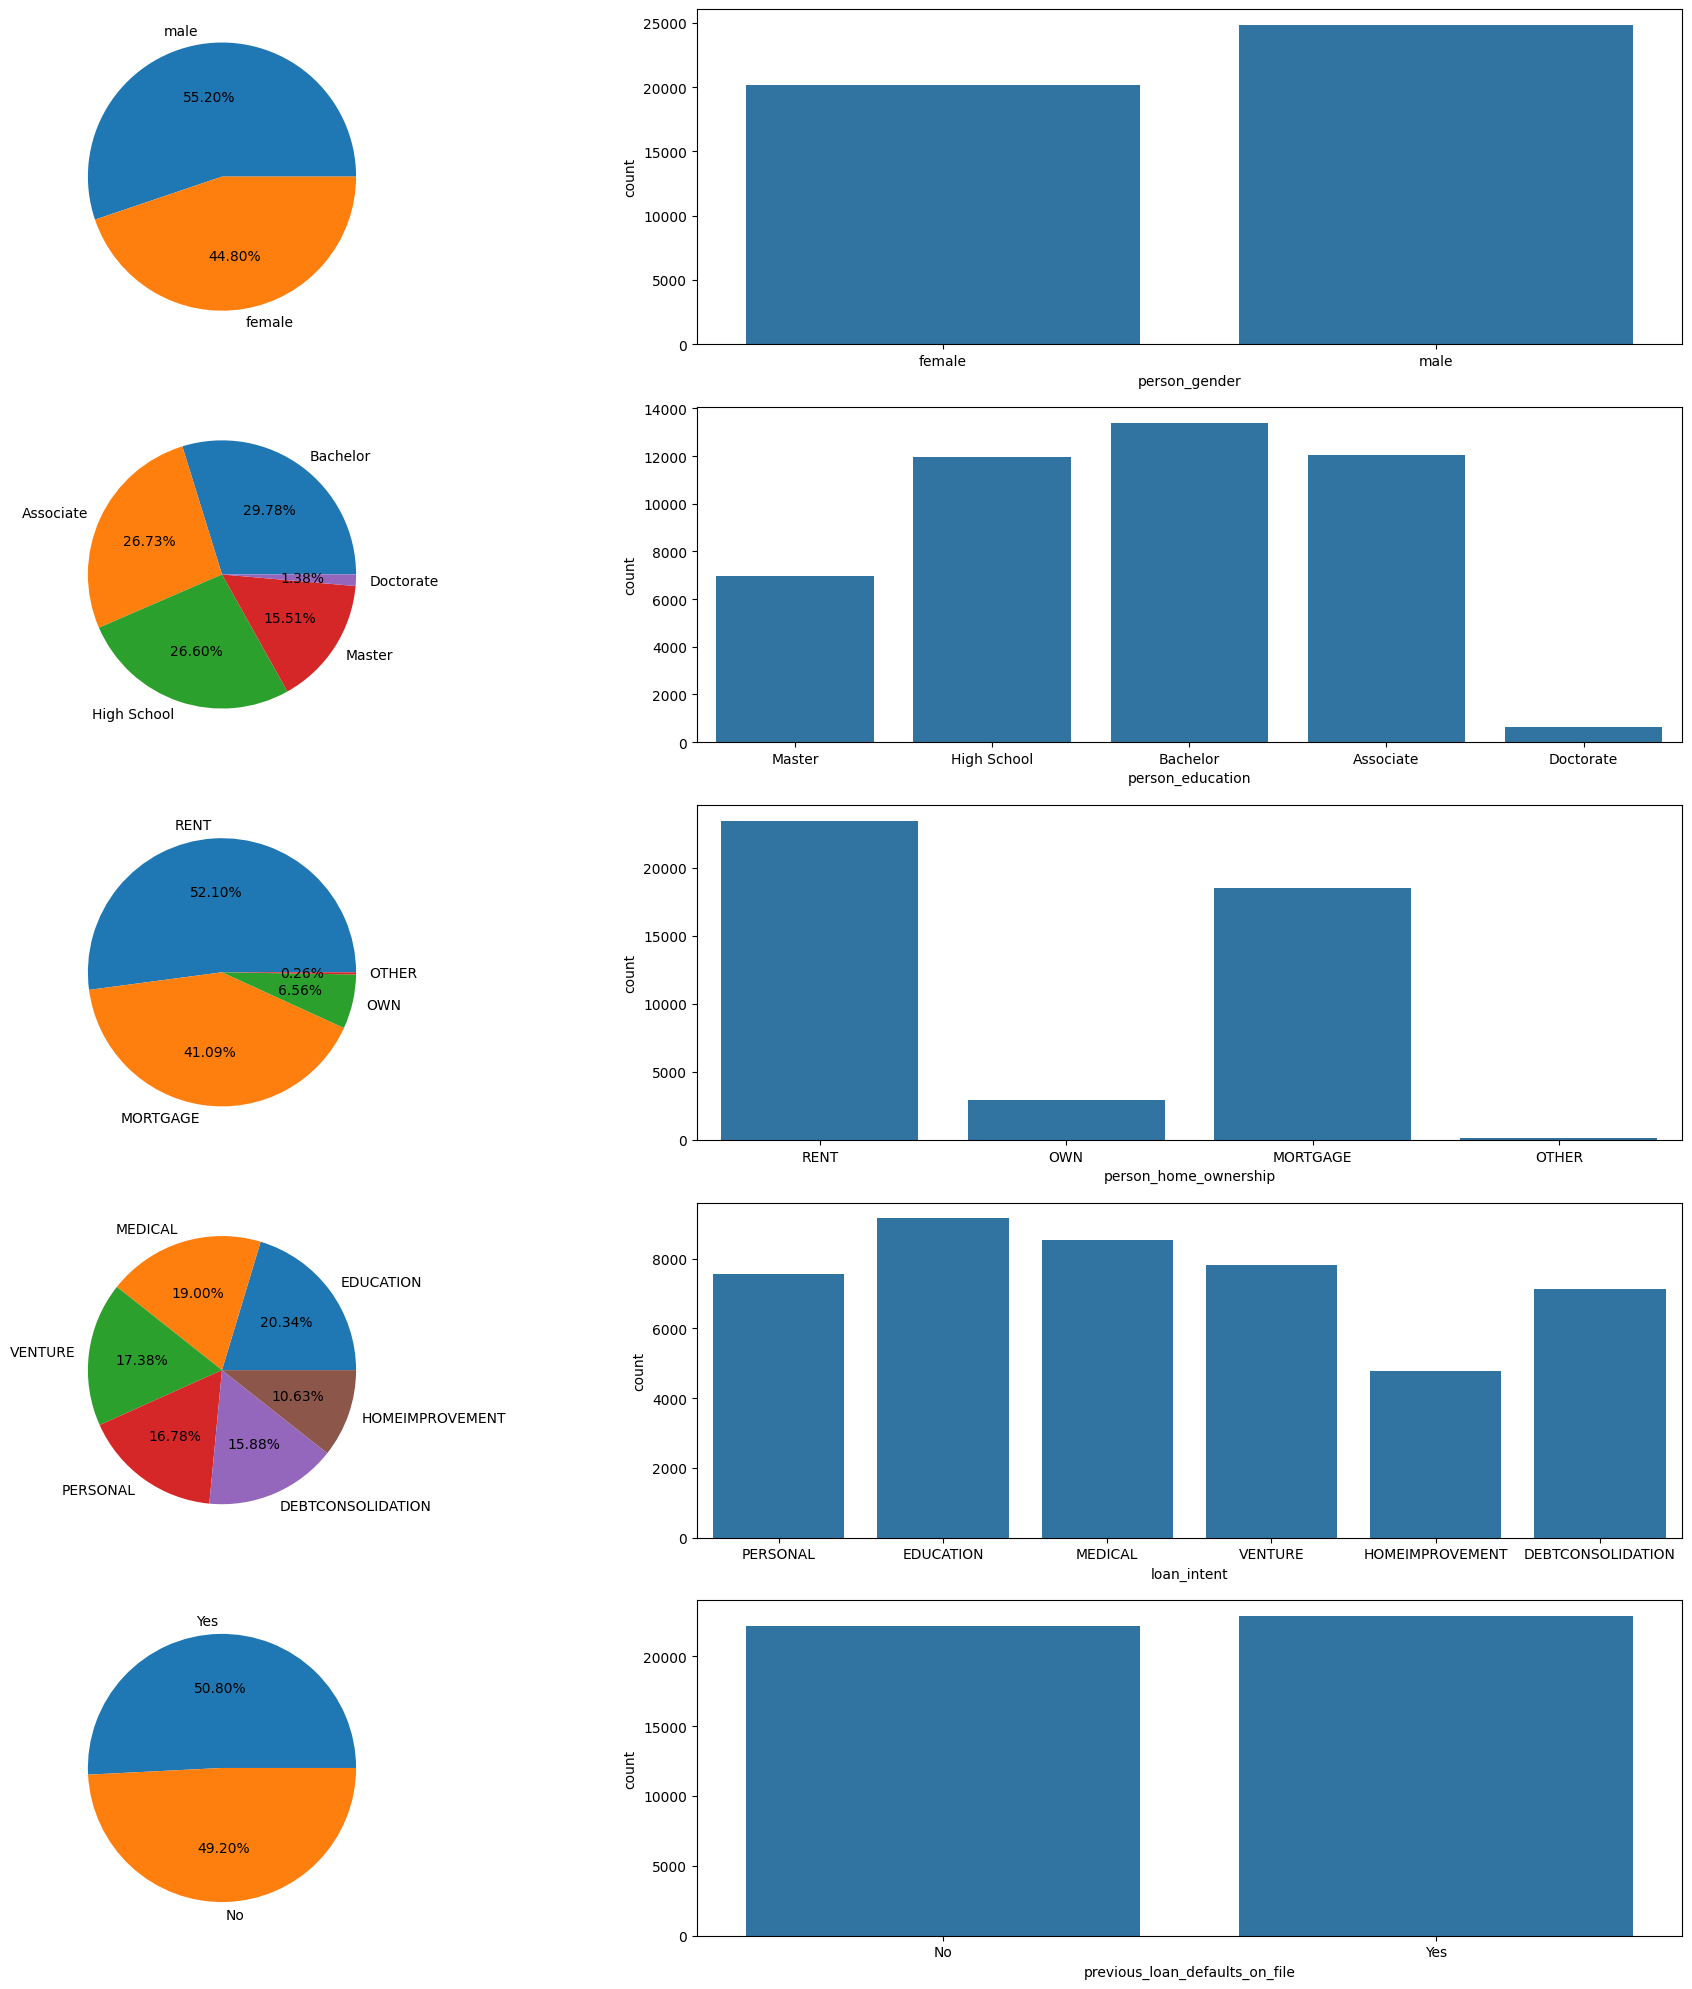

In [ ]:
fig, ax = plt.subplots(5, 2, figsize=(20, 20))
ax = ax.flatten()
i = 0
for feature in categorical_features:
    count_loan_approval = loan_approval[feature].value_counts().reset_index()
    if i < len(ax):
        ax[i].pie(x=count_loan_approval['count'], labels=count_loan_approval[feature], autopct='%.2f%%')
        i += 1
        if i < len(ax):
            sns.countplot(data=loan_approval, x=feature, ax=ax[i])
            i += 1
plt.tight_layout()
plt.show()

Các cột thuộc tính person_gender, loan_intent, previous_loan, defaults_on_file khá cân bằng, còn các biến person_education, persion_home_ownership lại bị mất cân bằng ở một số cột.

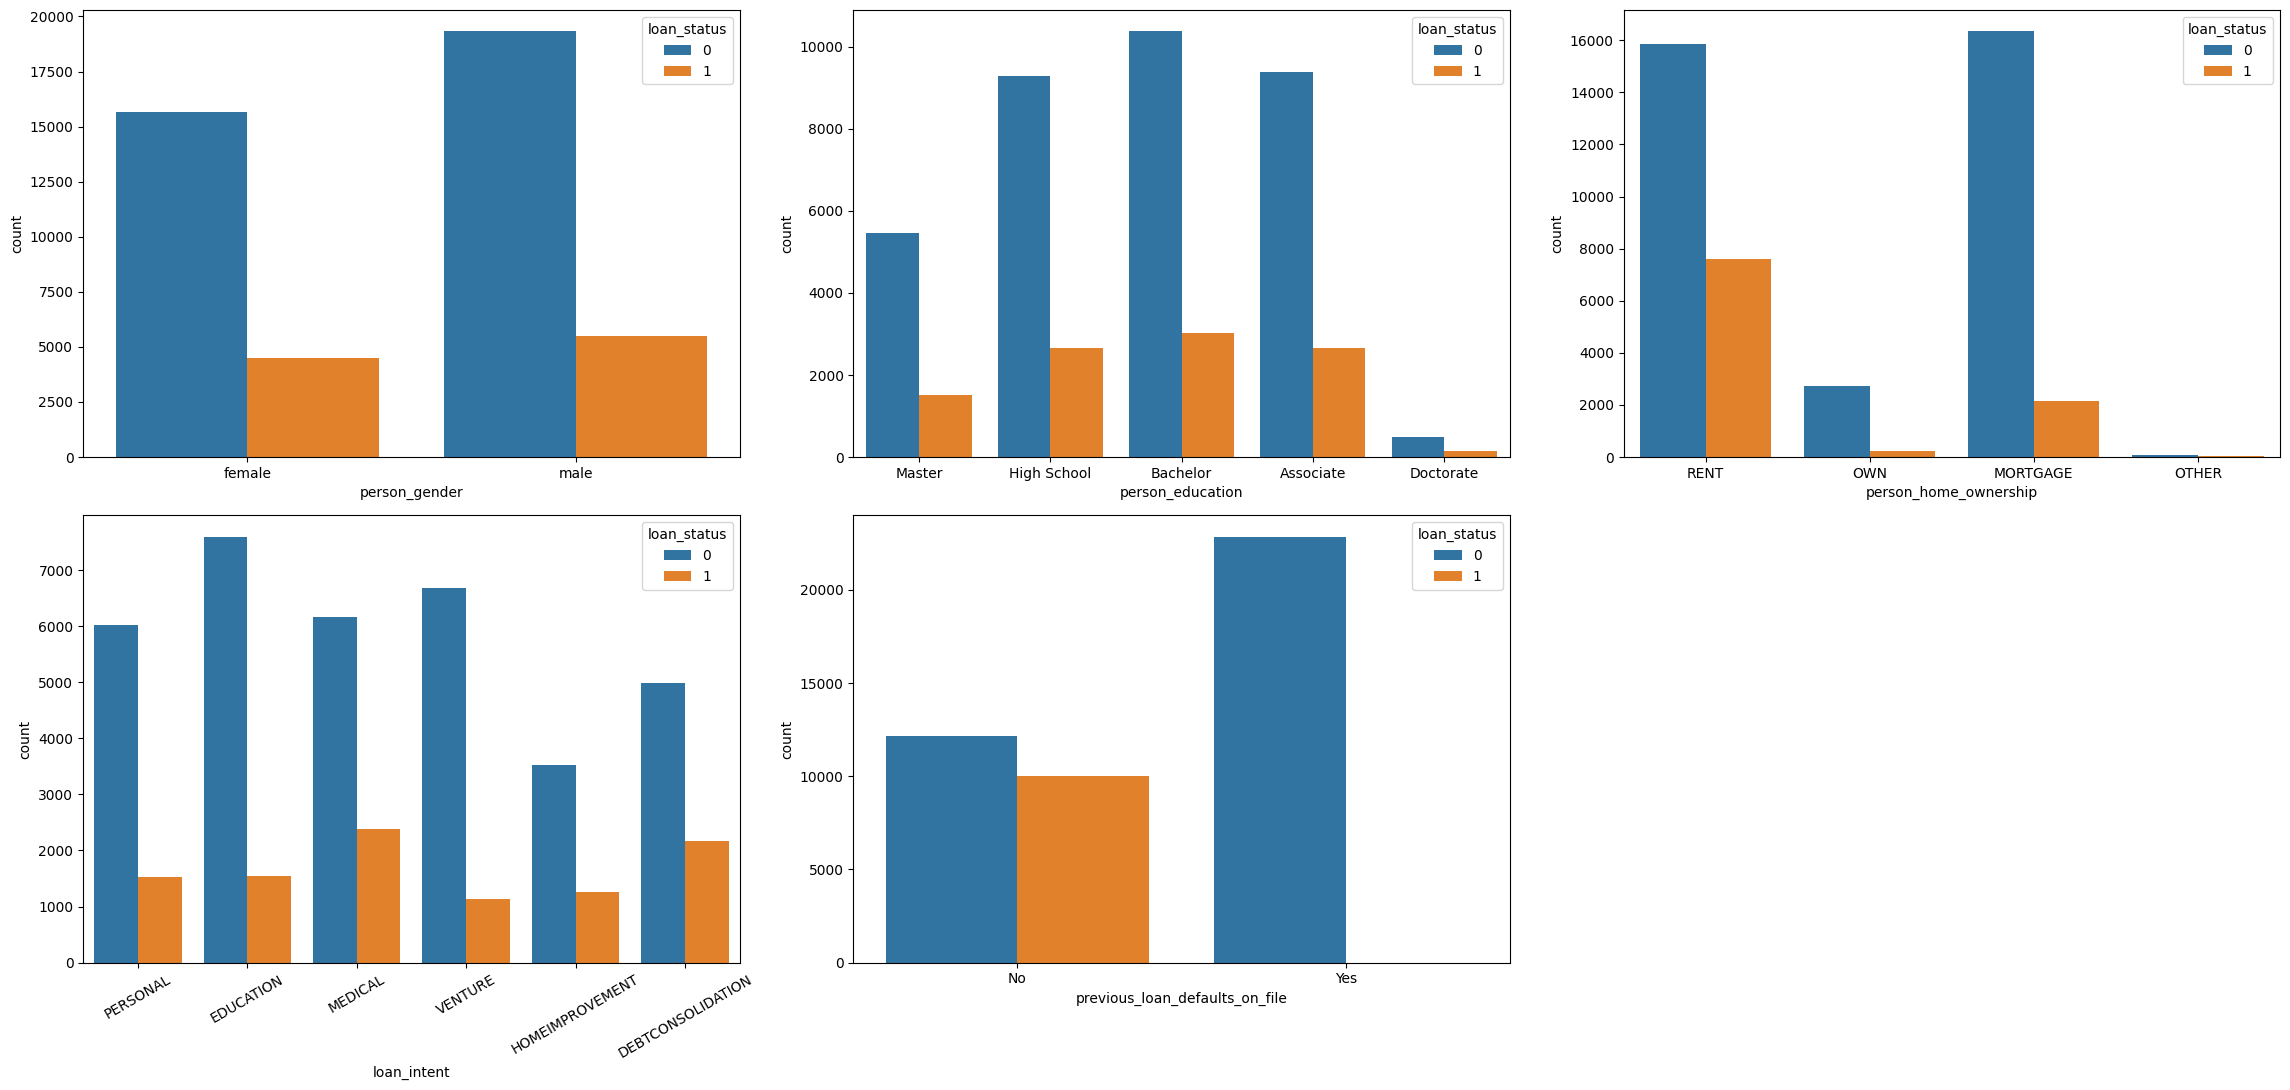

In [ ]:
plt.figure(figsize=(23, 11))
for index, feature in enumerate(categorical_features):
    plt.subplot(2, 3, index + 1)
    sns.countplot(data=loan_approval, x=feature, hue='loan_status')
    if feature in ['loan_intent']:
        plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## Numeric features

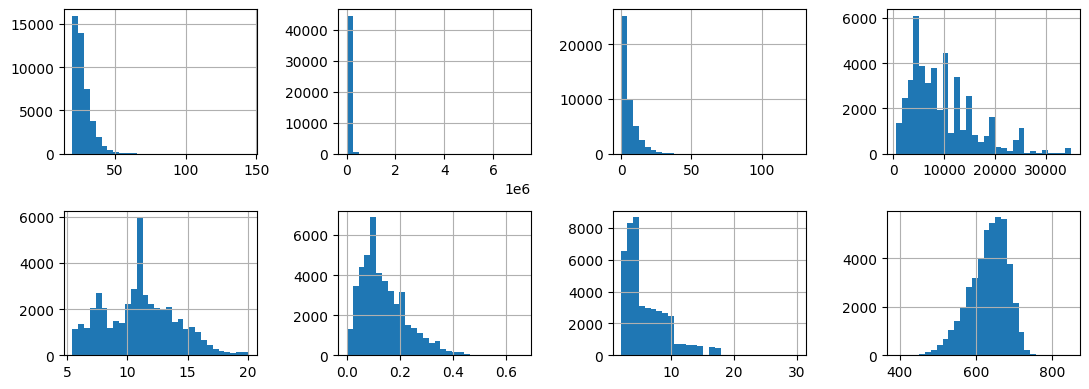

In [ ]:
plt.figure(figsize=(11, 4))
for index, feature in enumerate(numeric_features):
    plt.subplot(2, 4, index + 1)
    loan_approval[feature].hist(bins=30)
plt.tight_layout()
plt.show()

Đa phần các biến đều bị lệch trái.

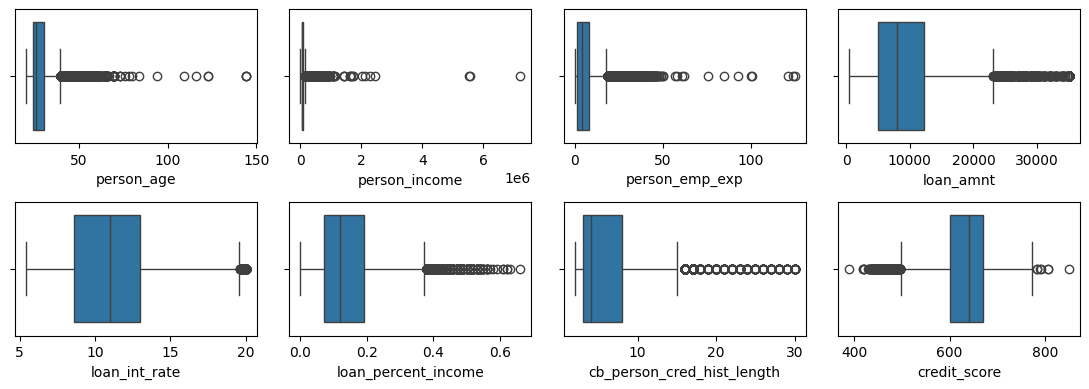

In [ ]:
plt.figure(figsize=(11, 4))
for index, feature in enumerate(numeric_features):
    plt.subplot(2, 4, index + 1)
    sns.boxplot(loan_approval, x=feature)
plt.tight_layout()
plt.show()

Trong biến person_age, có một số outlier lớn hơn 100 tuổi (khá vô lý).

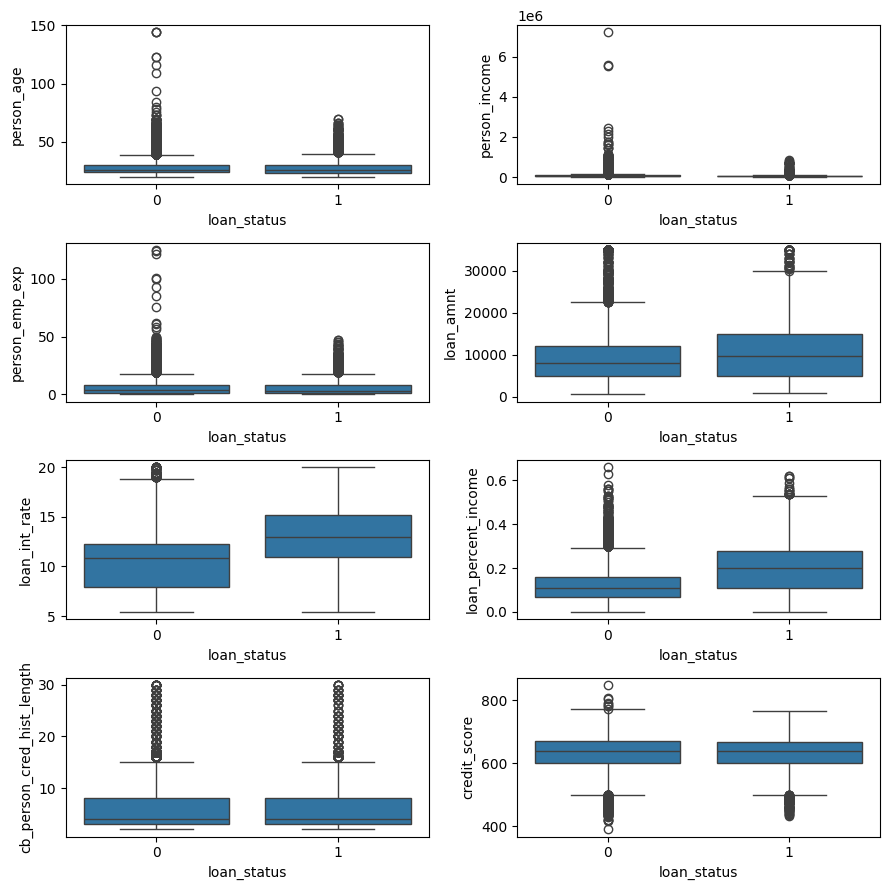

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(9, 9))
ax = ax.flatten()
for i, feature in enumerate(numeric_features):
    sns.boxplot(data=loan_approval, y=feature, x='loan_status', ax=ax[i])
plt.tight_layout()
plt.show()

Biến person_age, person_emp_exp, cb_person_cred_hist_length, credit_score chồng lấn lên nhau nên sẽ không có ảnh hưởng đáng kể đến biến mục tiêu (loan_status).

## Target

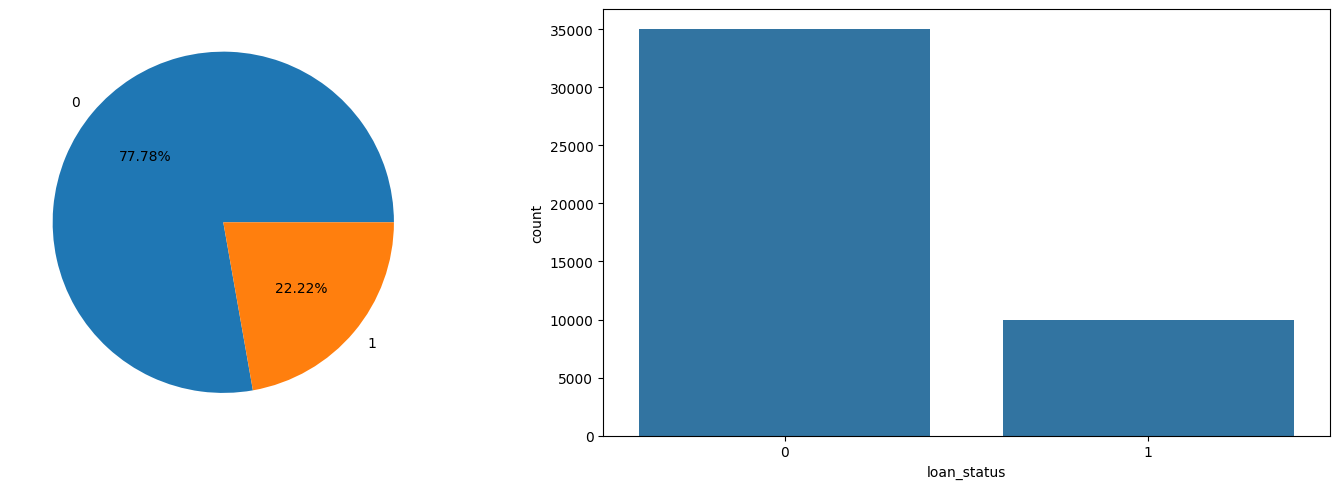

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
count_status_loan_approval = loan_approval['loan_status'].value_counts().reset_index()
ax[0].pie(x=count_status_loan_approval['count'], labels=count_status_loan_approval['loan_status'], autopct='%.2f%%')
sns.countplot(data=loan_approval, x='loan_status', ax=ax[1])
plt.tight_layout()
plt.show()

Dữ liệu đang bị mất cân bằng khi tỷ lệ bị reject (0) chiếm khá cao (có thể là do thực tế như thế).

In [ ]:
label_encoded_loan_approval = loan_approval.copy()
label_encoder = LabelEncoder()
for feature in categorical_features:
    label_encoded_loan_approval[feature] = label_encoder.fit_transform(label_encoded_loan_approval[feature])
label_encoded_loan_approval

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


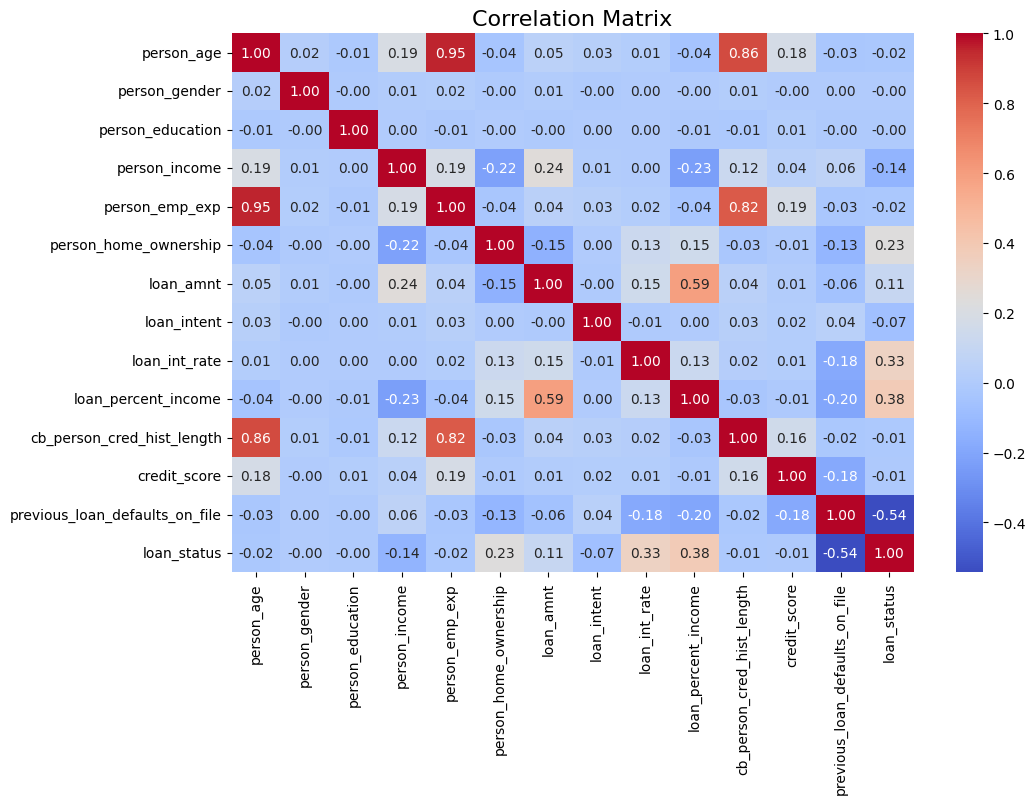

In [ ]:
plt.figure(figsize=(11, 7))
sns.heatmap(label_encoded_loan_approval.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

- Biến person_emp_exp có tương quan mạnh với biến person_age => nên bỏ một cột.
- 2 biến person_gender, person_education không tương quan với biến mục tiêu => bỏ.

In [ ]:
x = label_encoded_loan_approval.drop(columns='loan_status')
y = label_encoded_loan_approval['loan_status']
mi = mutual_info_classif(x, y)
mi_loan_approval = pd.DataFrame({'Feature': x.columns, 'Mutual Information': mi})
mi_loan_approval = mi_loan_approval.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)
mi_loan_approval

,Feature,Mutual Information
0,previous_loan_defaults_on_file,0.197544
1,person_income,0.091899
2,loan_percent_income,0.082443
3,loan_int_rate,0.067947
4,person_home_ownership,0.037100
5,loan_amnt,0.019229
6,loan_intent,0.012398
7,person_gender,0.003960
8,cb_person_cred_hist_length,0.001158
9,person_emp_exp,0.000000


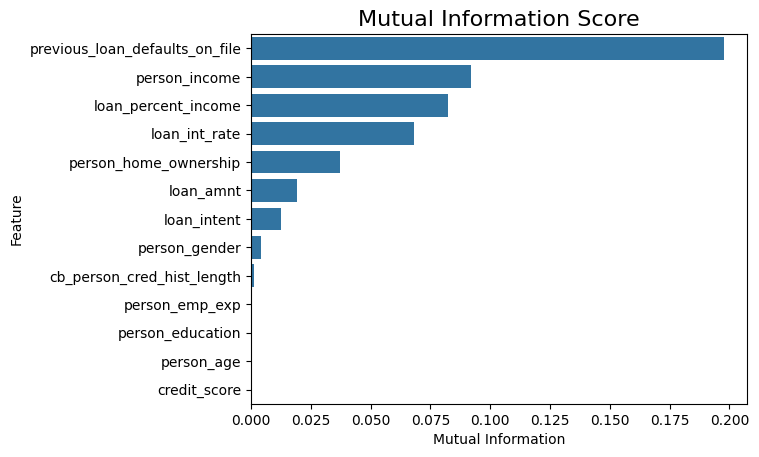

In [ ]:
plt.figure()
sns.barplot(x='Mutual Information',y='Feature', data=mi_loan_approval)
plt.title('Mutual Information Score', fontsize=16)
plt.show()

4 biến cb_person_cred_hist_length, person_emp_exp, person_education, credit_score tương quan quá yếu với biến mục tiêu => bỏ

# Preprocess data

## Remove outliers

In [ ]:
loan_approval['person_age'] = loan_approval['person_age'].apply(lambda x: loan_approval['person_age'].median() if x > 100 else x)

## Select features

In [ ]:
categorical_features.remove('person_education')
categorical_features.remove('person_gender')
categorical_features

['person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

In [ ]:
numeric_features.remove('cb_person_cred_hist_length')
numeric_features.remove('person_emp_exp')
numeric_features.remove('credit_score')
numeric_features.remove('person_age')
numeric_features

['person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']

In [ ]:
loan_approval = loan_approval.drop(columns=['cb_person_cred_hist_length', 'person_emp_exp', 'person_education', 'credit_score', 'person_age', 'person_gender'])
loan_approval

,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status
0,71948.0,RENT,35000.0,PERSONAL,16.02,0.49,No,1
1,12282.0,OWN,1000.0,EDUCATION,11.14,0.08,Yes,0
2,12438.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,No,1
3,79753.0,RENT,35000.0,MEDICAL,15.23,0.44,No,1
4,66135.0,RENT,35000.0,MEDICAL,14.27,0.53,No,1
...,...,...,...,...,...,...,...,...
44995,47971.0,RENT,15000.0,MEDICAL,15.66,0.31,No,1
44996,65800.0,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,No,1
44997,56942.0,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,No,1
44998,33164.0,RENT,12000.0,EDUCATION,13.23,0.36,No,1


## Encode categorical features

In [ ]:
label_encoder = LabelEncoder()
loan_approval['previous_loan_defaults_on_file'] = label_encoder.fit_transform(loan_approval['previous_loan_defaults_on_file'])
loan_approval

,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status
0,71948.0,RENT,35000.0,PERSONAL,16.02,0.49,0,1
1,12282.0,OWN,1000.0,EDUCATION,11.14,0.08,1,0
2,12438.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,0,1
3,79753.0,RENT,35000.0,MEDICAL,15.23,0.44,0,1
4,66135.0,RENT,35000.0,MEDICAL,14.27,0.53,0,1
...,...,...,...,...,...,...,...,...
44995,47971.0,RENT,15000.0,MEDICAL,15.66,0.31,0,1
44996,65800.0,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,0,1
44997,56942.0,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,0,1
44998,33164.0,RENT,12000.0,EDUCATION,13.23,0.36,0,1


In [ ]:
onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_features = onehot_encoder.fit_transform(loan_approval[[feature for feature in categorical_features if feature not in ['previous_loan_defaults_on_file']]])
onehot_columns = onehot_encoder.get_feature_names_out([feature for feature in categorical_features if feature not in ['previous_loan_defaults_on_file']])
onehot_dataframe = pd.DataFrame(onehot_features, columns=onehot_columns)
loan_approval = pd.concat([loan_approval.drop(columns=[feature for feature in categorical_features if feature not in ['previous_loan_defaults_on_file']]), onehot_dataframe], axis=1)
loan_approval

,person_income,loan_amnt,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,71948.0,35000.0,16.02,0.49,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,12282.0,1000.0,11.14,0.08,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,12438.0,5500.0,12.87,0.44,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,79753.0,35000.0,15.23,0.44,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,66135.0,35000.0,14.27,0.53,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,47971.0,15000.0,15.66,0.31,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
44996,65800.0,9000.0,14.07,0.14,0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
44997,56942.0,2771.0,10.02,0.05,0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
44998,33164.0,12000.0,13.23,0.36,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
scaler = StandardScaler()
loan_approval[numeric_features] = scaler.fit_transform(loan_approval[numeric_features])
loan_approval

,person_income,loan_amnt,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,-0.104090,4.024953,1.683039,4.016394,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.846005,-1.359209,0.044782,-0.684829,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.844065,-0.646600,0.625557,3.443074,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.007039,4.024953,1.417829,3.443074,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.176371,4.024953,1.095549,4.475050,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-0.402231,0.857799,1.562184,1.952442,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
44996,-0.180537,-0.092348,1.028407,0.003155,0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
44997,-0.290681,-1.078758,-0.331212,-1.028821,0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
44998,-0.586348,0.382726,0.746412,2.525762,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## Split train, test dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(loan_approval.drop(columns='loan_status'), loan_approval['loan_status'], test_size=0.2, random_state=42)

# Apply model

In [ ]:
def apply_model(model_type, X_train, y_train, X_test, y_test):
    if model_type == 'KNN':
        model = KNeighborsClassifier()
    elif model_type == 'Decision Tree':
        model = DecisionTreeClassifier(max_depth=4, random_state=42)
    elif model_type == 'Random Forest':
        model = RandomForestClassifier()
    elif model_type == 'Logistic Regression':
        model = LogisticRegression(max_iter=1000)

    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)

    print(classification_report(y_test, y_predict))

    sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6990
           1       0.82      0.76      0.79      2010

    accuracy                           0.91      9000
   macro avg       0.88      0.85      0.87      9000
weighted avg       0.91      0.91      0.91      9000



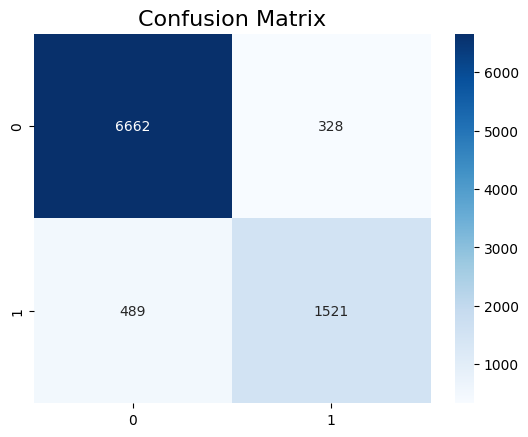

In [ ]:
apply_model('KNN', X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6990
           1       0.85      0.71      0.78      2010

    accuracy                           0.91      9000
   macro avg       0.89      0.84      0.86      9000
weighted avg       0.91      0.91      0.91      9000



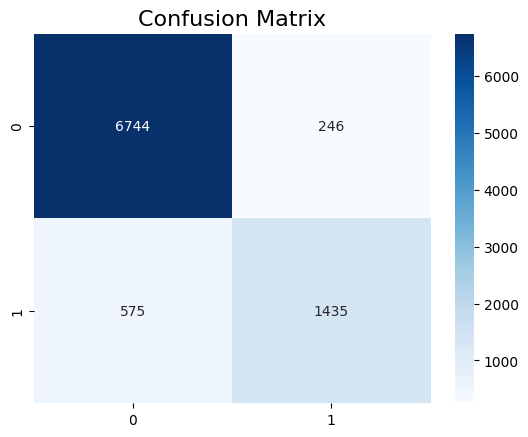

In [ ]:
apply_model('Decision Tree', X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.88      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000



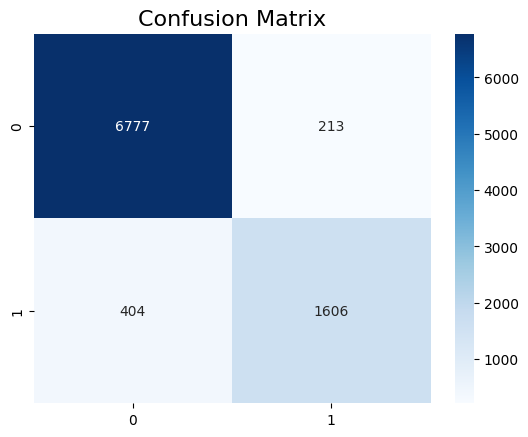

In [ ]:
apply_model('Random Forest', X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      6990
           1       0.76      0.73      0.75      2010

    accuracy                           0.89      9000
   macro avg       0.84      0.83      0.84      9000
weighted avg       0.89      0.89      0.89      9000



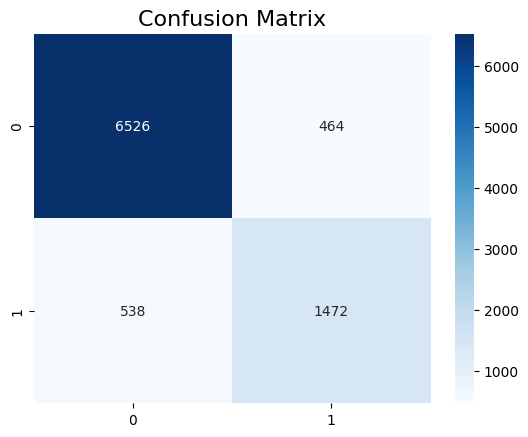

In [ ]:
apply_model('Logistic Regression', X_train, y_train, X_test, y_test)

# K-Fold Cross-Validation

In [ ]:
def apply_model_k_fold(model_type, X, y):
    X = X.values
    y = y.values

    if model_type == 'KNN':
        model = KNeighborsClassifier()
    elif model_type == 'Decision Tree':
        model = DecisionTreeClassifier(max_depth=4, random_state=42)
    elif model_type == 'Random Forest':
        model = RandomForestClassifier()
    elif model_type == 'Logistic Regression':
        model = LogisticRegression()

    k = 5
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    best_fold = None
    best_f1_score = 0
    best_y_test = None
    best_y_predict = None

    for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):

      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]

      model.fit(X_train, y_train)
      y_predict = model.predict(X_test)

      f1 = f1_score(y_test, y_predict)
      if f1 > best_f1_score:
          best_fold = fold
          best_f1_score = f1
          best_y_test = y_test
          best_y_predict = y_predict

    print(classification_report(best_y_test, best_y_predict))

    sns.heatmap(confusion_matrix(best_y_test, best_y_predict), annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

In [ ]:
X = loan_approval.drop(columns='loan_status')
y = loan_approval['loan_status']

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7001
           1       0.82      0.76      0.79      1999

    accuracy                           0.91      9000
   macro avg       0.87      0.86      0.87      9000
weighted avg       0.91      0.91      0.91      9000



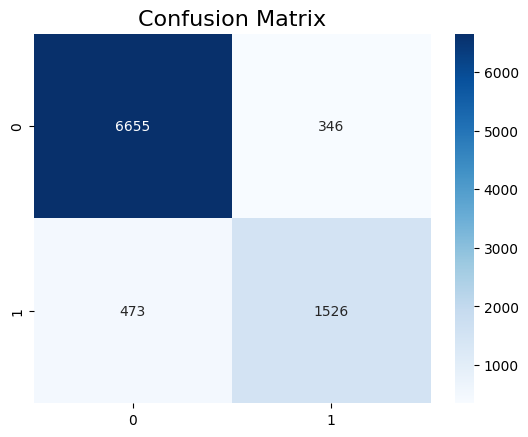

In [ ]:
apply_model_k_fold('KNN', X, y)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6984
           1       0.86      0.72      0.78      2016

    accuracy                           0.91      9000
   macro avg       0.89      0.84      0.86      9000
weighted avg       0.91      0.91      0.91      9000



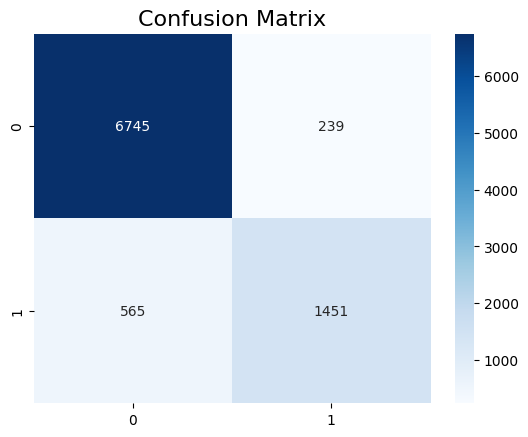

In [ ]:
apply_model_k_fold('Decision Tree', X, y)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.88      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000



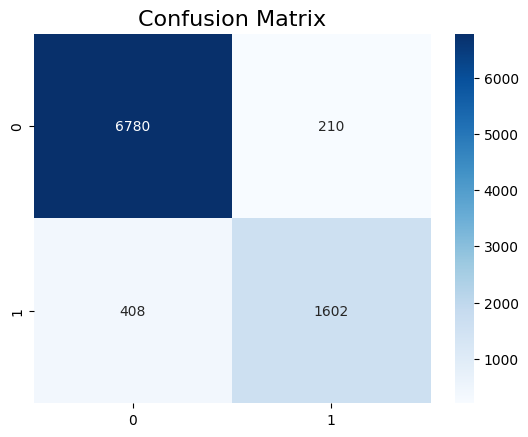

In [ ]:
apply_model_k_fold('Random Forest', X, y)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7009
           1       0.77      0.75      0.76      1991

    accuracy                           0.90      9000
   macro avg       0.85      0.84      0.85      9000
weighted avg       0.89      0.90      0.90      9000



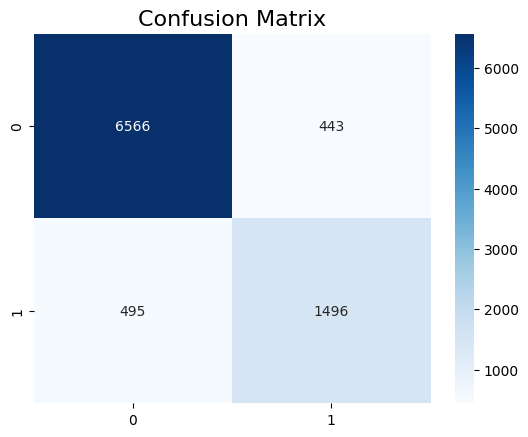

In [ ]:
apply_model_k_fold('Logistic Regression', X, y)

#Decision Tree to make decision

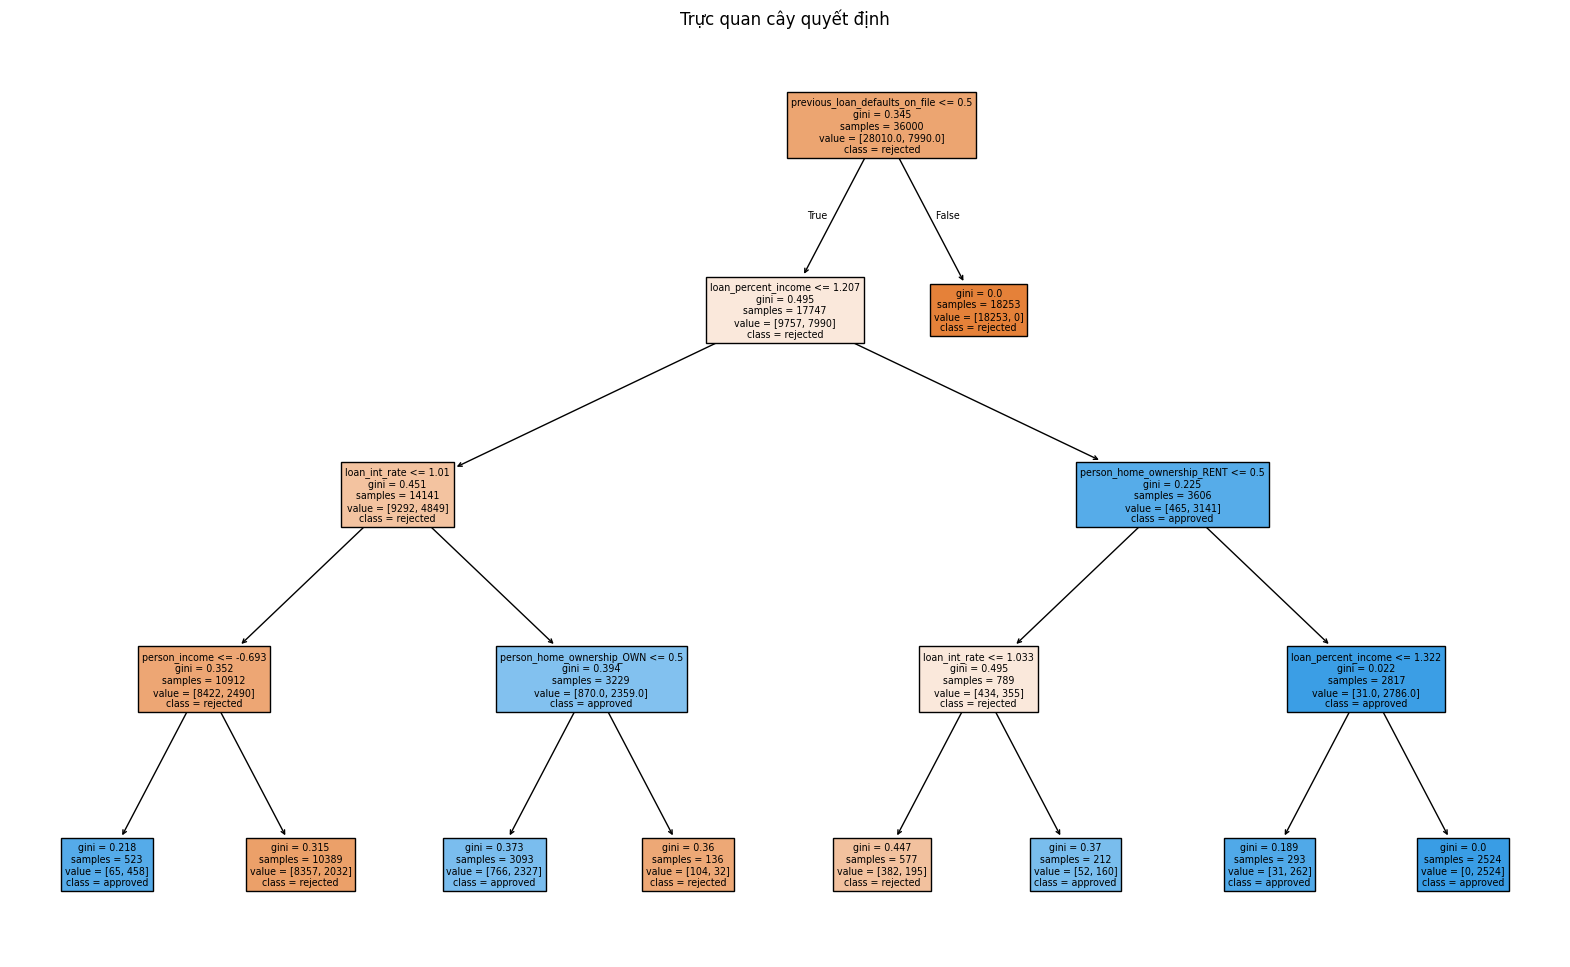

In [ ]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(20, 12))
plot_tree(model, feature_names=X_train.columns.tolist(), class_names=["rejected", "approved"], filled=True)
plt.title("Trực quan cây quyết định")
plt.show()

Cây trên thể hiện lịch sử nợ xấu là yếu tố hàng đầu để có xem xét tiếp hồ sơ không. Nếu đã từng có nợ xấu thì khả năng cao hồ sơ nên được từ chối. Nếu chưa có lịch sử nợ xấu, mức vay hợp lý với thu nhập thì trong các trường hợp sau có thể tiếp nhận hồ sơ vay:

- Lãi suất vay ở mức phổ biến, và thu nhập thấp.

- Lãi suất vay cao hơn bình thường và người vay hiện không sở hữu nhà. Điều này có vẻ không hợp lý vì người đã có nhà đối mặt với ít rủi ro chi trả hơn. Chúng ta sẽ cần dữ liệu nhân khẩu học chuyên sâu hơn nếu cần hiểu hành vi của nhóm người này.

- Người vay hiện không thuê nhà và lãi suất cho vay cao hơn mức phổ biến. Điều này có thể gợi ý rằng nhóm người không thuê nhà có thể chấp nhận mức rủi ro tín dụng cao hơn.

- Tiếp nhận hồ sơ của người vay hiện đang thuê nhà, nhưng khả năng chấp nhận sẽ cao hơn với hồ sơ yêu cầu mức vay từ 0.245-0.255.